In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pandas as pd



In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
print('test data:',test.shape,"    ","train data:",train.shape)

test data: (7172, 785)      train data: (27455, 785)


In [3]:
ytrain = train["label"].to_numpy()
ytest = test["label"].to_numpy()


In [4]:
test.drop(columns = ["label"],inplace = True)
train.drop(columns = ["label"],inplace = True)


In [5]:
xtest = test.to_numpy()
xtrain = train.to_numpy()

In [6]:
xtest = xtest.reshape(xtest.shape[0],28,28)
xtrain = xtrain.reshape(xtrain.shape[0],28,28)

In [7]:
print('test data:',xtest.shape," ",ytest.shape, "      ","train data:",xtrain.shape," ",ytrain.shape)

test data: (7172, 28, 28)   (7172,)        train data: (27455, 28, 28)   (27455,)


In [8]:
print(xtest.shape,
ytest.shape)


xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)
# pixel mean
px_mean = xtrain.mean()
print(px_mean)
# pixels standard deviation
px_std = xtrain.std()
print(px_std)

xtrain = (xtrain-px_mean)/px_std





px_mean_test = xtest.mean()
px_std_test = xtest.std()
xtest = (xtest-px_mean_test)/px_std_test

print(xtest.shape,
ytest.shape)

(7172, 28, 28) (7172,)
159.2910081989452
48.76950534451021
(7172, 28, 28, 1) (7172,)


In [9]:
model = Sequential()

model.add(Conv2D(5, kernel_size=(3,3),input_shape = (28,28,1)))# convolution layes 1 

model.add(MaxPooling2D(pool_size=(2, 2)))# pooling layer for features preservation

model.add(Flatten()) #converted 2d array into fully connected vector for classification on the bases of features that are preset as form of values in vector
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.02))
model.add(Dense(25,activation=tf.nn.softmax))# for classification of features into 10 classes by softmax reg


print(xtest.shape,
ytest.shape)

(7172, 28, 28, 1) (7172,)


In [10]:
# training a model for best fitting parameters in 10 epocs
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=xtrain,y=ytrain, epochs=10)

print(xtest.shape,
ytest.shape)

Epoch 1/10
858/858 [==============================] - 3s 4ms/step - loss: 0.3489 - accuracy: 0.9023
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0109 - accuracy: 0.9981
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 9.2617e-04 - accuracy: 1.0000
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 4.4405e-04 - accuracy: 1.0000
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 0.0580 - accuracy: 0.9874
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 8.5053e-04 - accuracy: 1.0000
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 3.6865e-04 - accuracy: 1.0000
Epoch 8/10
858/858 [==============================] - 3s 4ms/step - loss: 0.0164 - accuracy: 0.9953
Epoch 9/10
858/858 [==============================] - 4s 5ms/step - loss: 5.9894e-04 - accuracy: 1.0000
Epoch 10/10
858/858 [==============================] - 3s 4ms/step - loss: 1.818

In [11]:
print(xtest.shape,
ytest.shape)
model.evaluate(xtest,ytest)

(7172, 28, 28, 1) (7172,)
225/225 [==============================] - 0s 2ms/step - loss: 0.7913 - accuracy: 0.8461


[0.7913339138031006, 0.8460680246353149]

label predicted 21
label 21


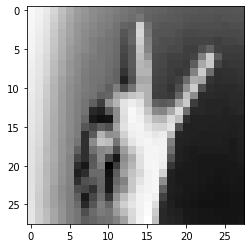

In [12]:

image_index = 5
plt.imshow(xtest[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(xtest[image_index].reshape(1, 28, 28, 1))
print("label predicted",pred.argmax())
print("label",ytest[image_index])